## PJI - Zeyd BOUMEHDI

# Réseau de neurones supervisé (Librairie Scikit-Learn)

In [1]:
#Ignore les warnings
import warnings
warnings.filterwarnings("ignore")

### Préambule

Nous allons utilisé le MLPClassier (Multilayer Perceptron Classifier), c'est un modèle de réseau de neurones qui consiste à connecter plusieurs couches de neurones ensemble.\
**Ex:** Chaque neurones de la couche 1 sera connecté aux neurones de la couche 2 et ainsi de suite.

_**Avantages:**_
- Faire des modèles non-linéaires.
- Apprendre en temps réel (en activant le paramètre: `partial_fit`).

_**Désavantages:**_
- Il existe des fonctions de pertes avec des minimas locaux. 
- Il faut modifier beacoup d'hyperparamètres pour avoir un bon modèle.
- Il prend des données d'entrée d'une dimension précise.

![MLP](rdn.png)

## Questions

- Quels sont les hyperparamètres d'un réseau de neurones ?\
_**Réponse:**_ Les plus importants sont l'iteration maxiamale pour apprendre (`max_iter`), puis le pas d'aprentissage (`learning rate`), la taille des couches cachées (`hidden_layer_sizes`), la fonction d'activation pour les couches cachées et le `solver` qui  fait l'optimisation des poids des neuronnes (Méthode de résolution avec les gradients).

_Sources:_
> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier \
> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

- Quels est la fonction de coût ?\
_**Réponse:**_ La fonction de coût d'un MLP est la log loss (Cross-Entropy).

_Sources:_ 
> https://stackoverflow.com/questions/50913508/what-is-the-difference-between-cross-entropy-and-log-loss-error/50926471#50926471 \
> https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

- Comment mesurer l'exhaustivité de la data ?\
_**Réponse:**_ On peut regarder les données et faire des interprétations avec des graphiques. On peut aussi vérifier qu'il n'y a pas de champs vide, pas de doublon et que les données doivent être représentative du problème à traiter. 

_Sources:_ 
> https://datascientest.com/data-quality-erreurs \
> https://www.simpleone.fr/la-qualite-des-donnees-data-quality/ \
> https://www.institutdesactuaires.com/global/gene/link.php?doc_id=789&fg=1 \
> https://www.lemagit.fr/definition/Qualite-des-donnees

## Importation des librairies

In [2]:
import numpy as np
import sklearn.neural_network as nn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

## Multilayer Perceptron pour la classification.

L'objectif de prédire la classe d'une iris selon la taille et longueur du sépale et du pétale.

In [3]:
from sklearn.datasets import load_iris
import seaborn as sns

In [4]:
# Charge le dataset iris de sklearn
X, y = load_iris(return_X_y=True, as_frame=True)

In [5]:
# Crée un dictionnaire pour "traduire" les valeurs catégorielles en labels
Species = { 
    0: "Setosa", 
    1: "Versicolor",
    2: "Virginica"
}

In [6]:
data = X.copy()
data['target'] = y
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Affiche des statistiques du datset pour la distribution des données
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

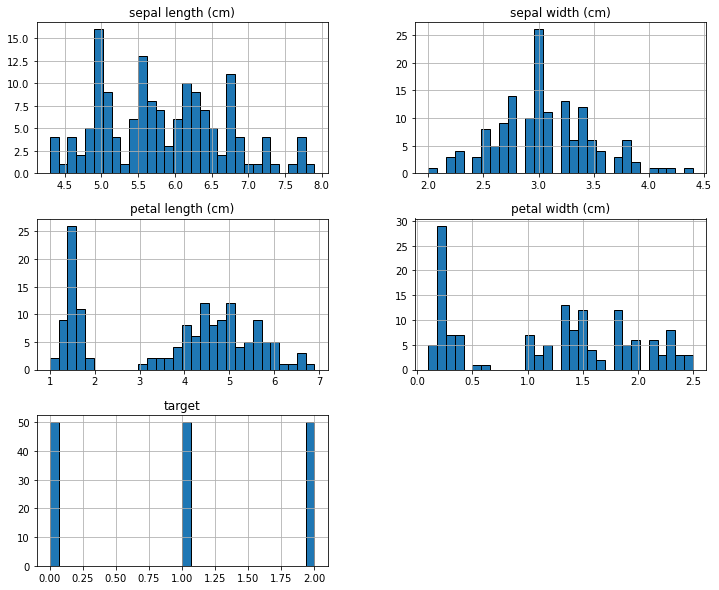

In [8]:
# Affiche graphiquement la répartition des colonnes du dataset avec des histogrammes
data.hist(figsize=(12, 10), bins=30, edgecolor="black")

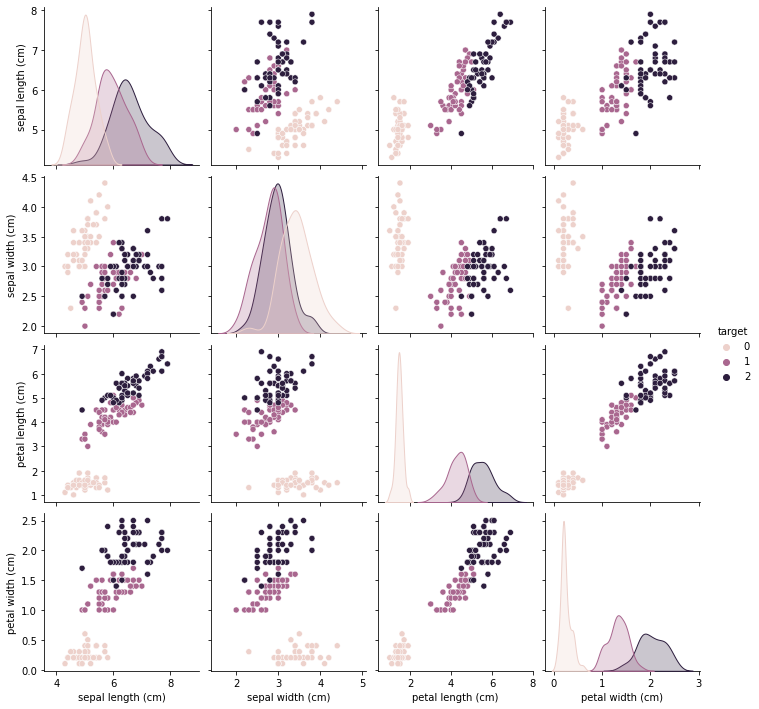

In [9]:
# Comme les données sont en 4D (car 4 colonnes qui définissent une iris) donc voici un affichage "4D"
sns.pairplot(data, hue='target', height=2.5);

In [10]:
# Crée un training set et un testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# Affiche la matrice de corrélation (pour voir les dépendances entre les différentes colonnes)
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [12]:
# On remarque une forte dépendance avec la colonne target entre la "petal width" et "petal length" (donc on les sélectionne)
col_sel = ['petal width (cm)', 'petal length (cm)']

In [13]:
# Initialisation d'un MLP avec un learning rate qui commence à 0.1
mlp_iris = nn.MLPClassifier(random_state=0, learning_rate_init=0.1)
mlp_iris.fit(X_train[col_sel], y_train) # Ici, on entraine le MLP avec le training set
mlp_iris.score(X_test[col_sel], y_test) # Et on calcul, le score avec le testing score (pour voir s'il a bien appris)

0.9736842105263158

In [14]:
# J'ai effectué une cross validation du score sur le training set
cross_val_score(mlp_iris, X_train, y_train, cv=5)

array([1.        , 0.95652174, 1.        , 0.95454545, 0.95454545])

In [15]:
# Idem sur le testing set
cross_val_score(mlp_iris, X_test, y_test, cv=5)

array([1.        , 0.875     , 1.        , 0.85714286, 0.85714286])

<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

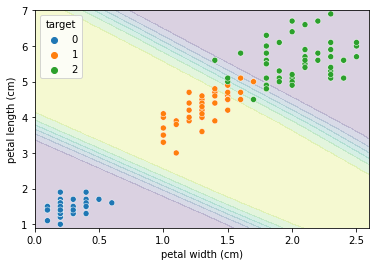

In [16]:
# Affichage de la prédiction du MLP
step=0.1
x_min, x_max = X[col_sel].iloc[:, 0].min()-step, X[col_sel].iloc[:, 0].max()+2*step
y_min, y_max = X[col_sel].iloc[:, 1].min()-step, X[col_sel].iloc[:, 1].max()+2*step
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

Z = mlp_iris.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy,  Z, alpha=.2)
sns.scatterplot(x=X[col_sel].iloc[:, 0], y=X[col_sel].iloc[:, 1], hue=y, palette="tab10")

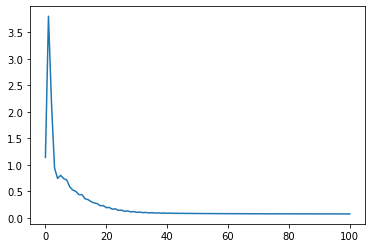

In [17]:
# Affiche la fonction de perte du MLP
plt.plot(mlp_iris.loss_curve_)

In [18]:
# Voici, la meilleur perte obtenu (la plus basse car on charche à la minimiser)
mlp_iris.best_loss_

0.07285379961697415

## Multilayer Perceptron pour la régression.

In [19]:
from sklearn.datasets import make_regression

In [20]:
# Charge un dataset avec make_regression()
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

In [21]:
X.shape, y.shape

((100, 1), (100,))

In [22]:
data = np.c_[X, y]
data.shape

(100, 2)

In [23]:
# Affiche les 5 premières valeurs du dataset
pd.DataFrame(data, columns=['X', 'y']).head()

,X,y
0,-0.359553,-19.955886
1,0.976639,21.339773
2,0.402342,11.556895
3,-0.813146,-16.342069
4,-0.887786,-35.700638


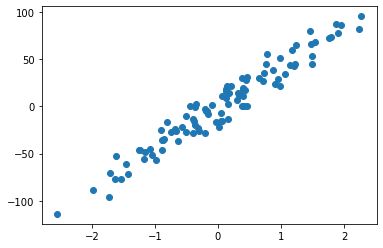

In [24]:
# Affichage graphiquement des données du dataset
plt.scatter(X, y)

In [25]:
# Sépare le dataset en training set et testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.10)

0.9701512084941989


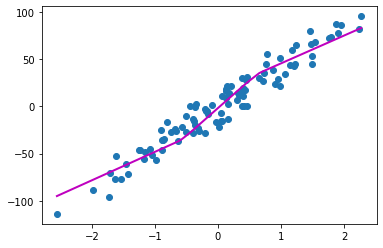

In [26]:
# On fait appel à un MLPRegressor avec un solver sgd (Gradient Stochastique)
mlp_reg = nn.MLPRegressor(solver='sgd')
mlp_reg.fit(X_train, y_train) # On l'entraine sur le training set
print(mlp_reg.score(X_test, y_test)) # Affiche le score du testing set

pred2 = mlp_reg.predict(X) # On prédit les valeurs de X
# Pour ensuite, faire un affichage de la régression obtenu en violet
plt.plot(np.sort(X[:,0]), np.sort(pred2), c='m', linewidth=2, label='MLP')
plt.scatter(X, y)

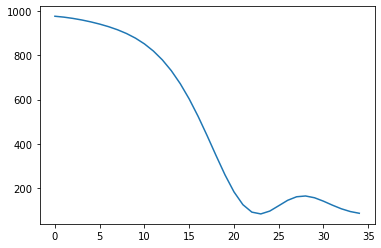

In [27]:
# Affichage de la fonction de perte
plt.plot(mlp_reg.loss_curve_)

In [28]:
# La meilleur perte trouvé par le MLP
mlp_reg.best_loss_

83.1660959193404

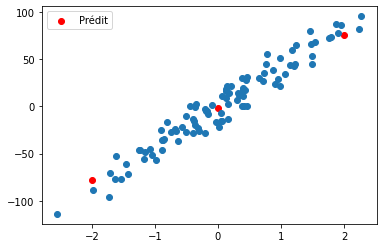

In [29]:
# On prédit certain afin de voir comment fonctionne la régression
p = np.array([-2, 0, 2]).reshape(-1, 1)
pred = mlp_reg.predict(p)
plt.scatter(p, pred, c='r', label='Prédit')
plt.scatter(X, y)
plt.legend()

In [30]:
inter = np.array([-3, 3]).reshape(-1, 1)

In [31]:
pred = mlp_reg.predict(inter)

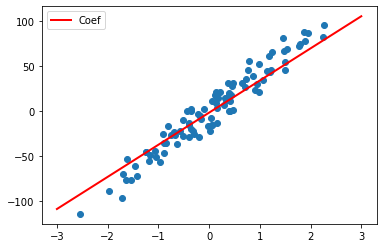

In [32]:
# On affichage la courbe de régression qui minimise l'erreur de la fonction de perte
plt.plot(inter, pred, c='r', linewidth=2, label='Coef')
plt.scatter(X, y)
plt.legend()

## Multilayer Perceptron pour classification d'image selon le genre.

L'objectif de prédire le genre d'une personne à partir d'une image.\
[Lien vers le dataset](https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv/discussion/180240#1032083)

### Importation des données

In [33]:
data = pd.read_csv('archive.zip')
# Affichage des 5 premières données
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [34]:
data.drop(columns='img_name', inplace=True) #Suppression de la colonne img_name car inutile

In [35]:
# Affichage des 5 premières données (pour voir si la colonne c'est bien supprimé)
data.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


### Analyse des données

* #### Description des données

In [36]:
data.iloc[:, :3].describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


* #### Graphique sur les données

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'ethnicity'}>],
       [<AxesSubplot:title={'center':'gender'}>, <AxesSubplot:>]],
      dtype=object)

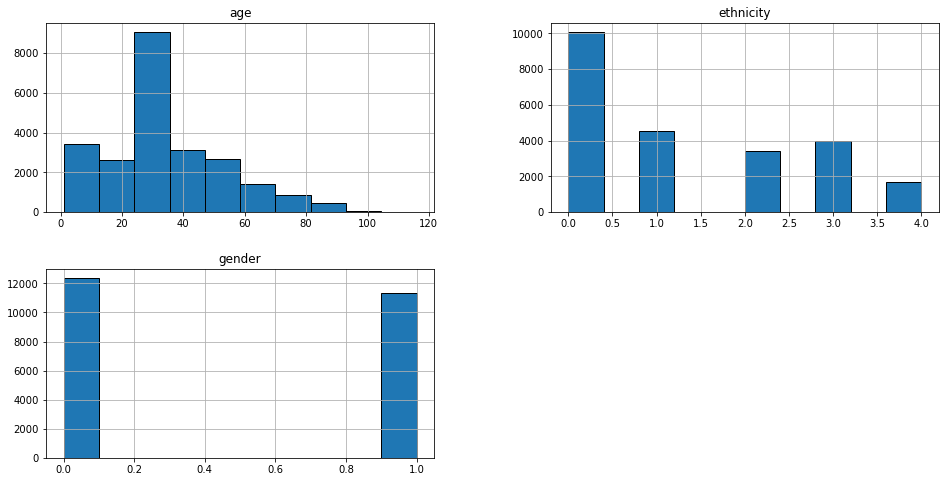

In [37]:
data.iloc[:, :3].hist(figsize=(16,8), ec="k")

In [38]:
data.iloc[:, :3].nunique()

age          104
ethnicity      5
gender         2
dtype: int64

**Note:** On remarque que sur les images:
- `Gender`: 55% hommes, 45% femmes (Valeur discrète: {0 ou 1})
- `Ethnicity`: 50% = 0, 19% = 1, 10% = 2, 16% = 3, 5% = 4 (Valeur discrète: {0, 1, 2, 3 ou 4}) 
- `Age`: (Valeur continue: entre 1 et 116)

### Labélisation des données

In [39]:
# Initialisation d'un dictionnaire pour "traduire" les valeurs catégorielles en labels
Gender = {
    0 : 'Male',
    1 : 'Female'
}

### Transformation des données

In [40]:
#Modification de la colonne pixels qui représente les images pour le convertir en ndarray afin de les rendre compréhensible par le réseau de neurones
data_pixels = data['pixels'].str.split(" ").tolist() 
data_pixels = pd.DataFrame(data_pixels, dtype=int)
data_images = data_pixels.values
data_images = data_images.astype(np.float64)
data_images.shape

(23705, 2304)

In [41]:
data_images.shape

(23705, 2304)

In [42]:
#X représente les images et y représente le sexe (genre) de la personne sur l'image.
X = data_images.copy()
y = np.array(data['gender'])

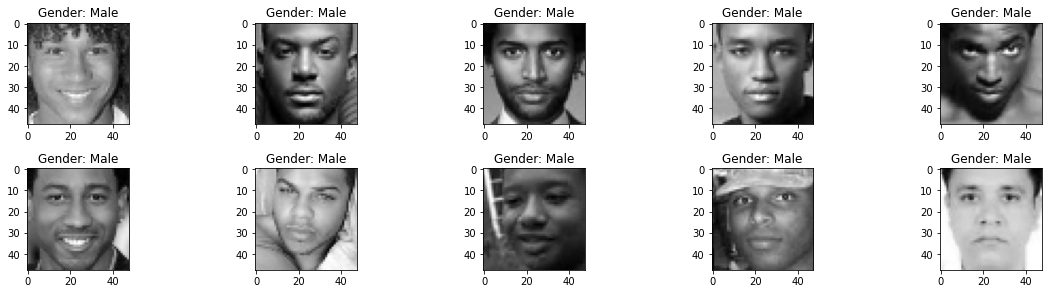

In [43]:
#Affichage d'images du dataset avec le label à prédire
plt.figure(figsize=(16, 8))
j=0
for i in range(5000, 5010):
    j+=1
    plt.subplot(4, 5, j)
    plt.imshow(X[i].reshape(48, 48), cmap='gray')
    plt.title('Gender: {}'.format(Gender[y[i]]))
    plt.tight_layout()
plt.show()

In [44]:
X.shape, y.shape

((23705, 2304), (23705,))

In [45]:
#Normalisation des données
X = X/255

In [46]:
#Sépare les données en trainingset et testingset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15882, 2304), (7823, 2304), (15882,), (7823,))

**Note:** Une transformation des données plus approfondie sera sûrement à entreprendre.

### Apprentissage des donnéees

* #### Selection des hyperparamètres

In [47]:
# Initialisation d'un dictionnaire qui contient les paramètres à rentrer dans la recherche du GridSearch (qui permet de trouver l'optimal de ces paramètres)
# Note: Je voulais mettre plus de paramètres mais déjà avec la fonction 'activation' et le 'solver', le temps de calcul est long.
params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
}

In [48]:
# Mise en place du GridSearch
gs = GridSearchCV(nn.MLPClassifier(random_state=0), params, n_jobs=-1, cv=3, scoring='accuracy')
gs.fit(X_train, y_train) # On l'entraine sur le training set
gs.best_params_, gs.best_score_  # Affichage des meilleurs paramètres et du meilleur score obtenu

({'activation': 'logistic', 'solver': 'adam'}, 0.8603450447046971)

In [49]:
mlp = gs.best_estimator_
mlp

MLPClassifier(activation='logistic', random_state=0)

In [50]:
mlp = nn.MLPClassifier(activation='logistic', random_state=0)

In [51]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=0)

* #### Précision du modèle selon la taille des données en entrée

In [52]:
sizes = list(range(100, 5000, 1000)) 

In [53]:
acc = {mlp : []}
std = {mlp : []}
for size in sizes:
    indices = np.random.choice(list(range(len(X_train))), size)
    r = cross_val_score(mlp, X_train[indices], y_train[indices])
    acc[mlp].append(np.mean(r))
    std[mlp].append(np.std(r))
    print("{:>25} ({}): {:1.3f} ({:1.3f})".format(mlp.__class__.__name__, size, np.mean(r), np.std(r)))
    print('-'*20)

            MLPClassifier (100): 0.650 (0.063)
--------------------
            MLPClassifier (1100): 0.808 (0.027)
--------------------
            MLPClassifier (2100): 0.824 (0.022)
--------------------
            MLPClassifier (3100): 0.849 (0.011)
--------------------
            MLPClassifier (4100): 0.863 (0.015)
--------------------


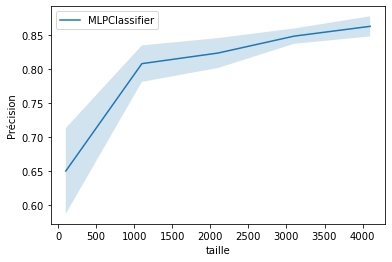

In [54]:
fig, ax = plt.subplots()
ax.plot(sizes, acc[mlp], label=mlp.__class__.__name__)
ax.fill_between(sizes, np.array(acc[mlp])-np.array(std[mlp]), np.array(acc[mlp])+np.array(std[mlp]), alpha=.2)
ax.legend()
ax.set_xlabel("taille")
ax.set_ylabel("Précision")
None

**Note:** On constate que plus il y a de données, plus le MLP est précis.

* #### Temps d'exécution lors de l'apprentissage et de la prédiction selon la taille des données en entrée

In [55]:
tps_fit = {mlp : []}
tps_pred = {mlp : []}
for size in sizes:
    indices = np.random.choice(list(range(len(X_train))), size)
    tf = %timeit -o -q -r1 -n1 mlp.fit(X_train[indices], y_train[indices])
    tp = %timeit -o -q -r1 -n1 mlp.predict(X_train[indices])
    tps_fit[mlp].append(tf.timings[0])
    tps_pred[mlp].append(tp.timings[0])
    print("{:>25} ({}) fit : {:1.3f} ; Pred {:1.3f}".format(mlp.__class__.__name__, size, tf.timings[0], tp.timings[0]))
    print("-"*20)

            MLPClassifier (100) fit : 1.824 ; Pred 0.002
--------------------
            MLPClassifier (1100) fit : 12.814 ; Pred 0.011
--------------------
            MLPClassifier (2100) fit : 23.852 ; Pred 0.024
--------------------
            MLPClassifier (3100) fit : 37.637 ; Pred 0.036
--------------------
            MLPClassifier (4100) fit : 56.400 ; Pred 0.064
--------------------


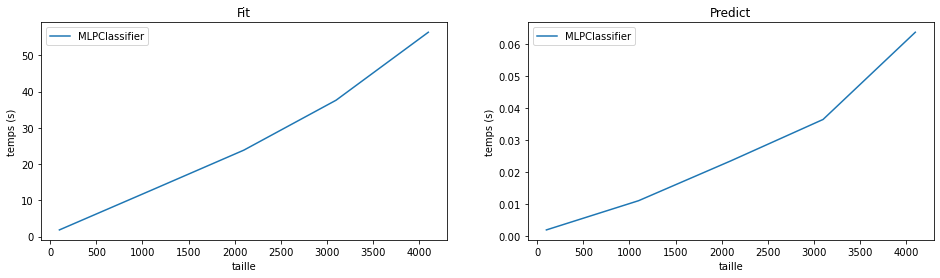

In [56]:
fig, ax1 = plt.subplots(1, 2, figsize=(16, 4), sharex = True)
ax1[0].plot(sizes, tps_fit[mlp], label=mlp.__class__.__name__)
ax1[1].plot(sizes, tps_pred[mlp], label=mlp.__class__.__name__)
    
ax1[0].legend()
ax1[0].set_title("Fit")
ax1[0].set_xlabel("taille")
ax1[0].set_ylabel("temps (s)")
ax1[1].legend()
ax1[1].set_title("Predict")
ax1[1].set_xlabel("taille")
ax1[1].set_ylabel("temps (s)")

None

**Note:** On observe que plus il y a de données, plus le temps de calcul est long. Donc il faut faire un compromis, c'est-à-dire avoir un nombre de données et un temps de cacul qui sont acceptables.

In [57]:
mlp.best_loss_

0.12932363671331784

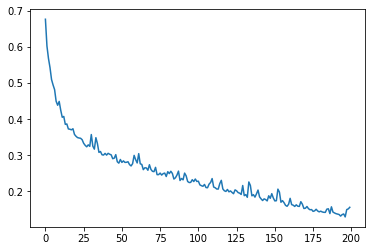

In [58]:
plt.plot(mlp.loss_curve_)

* #### Test de prédiction

Text(0.5, 1.0, 'Genre à prédire: Male')

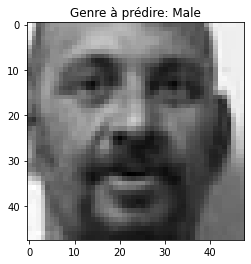

In [59]:
plt.imshow(X_test[0].reshape(48, 48), cmap='gray')
plt.title("Genre à prédire: {}".format(Gender[y_test[0]]))

In [60]:
Gender[mlp.predict(X_test[0].reshape(1,-1))[0]]

'Male'

**Résultat:** Le modèle a prédit le bon label pour cette image.

* #### Réduire l'effet boite noire

In [61]:
print("Train score: %f" % mlp.score(X_train, y_train))
print("Test score: %f" % mlp.score(X_test, y_test))

Train score: 0.862360
Test score: 0.839192


Nous voyons que le réseau de neurones donne de bon résultat mais il y a un effet boite noire.

**Note:** Réduire l'effet boite noire permet de répondre à la question suivante "Comment fonctionne ce réseau de neurones ?".\
Pour cela, une technique utilisé est de regarder les coefficients des neurones.

In [62]:
mlp.hidden_layer_sizes

(100,)

Ici, nous avons une couche de neurones cachés qui contient 100 neurones.

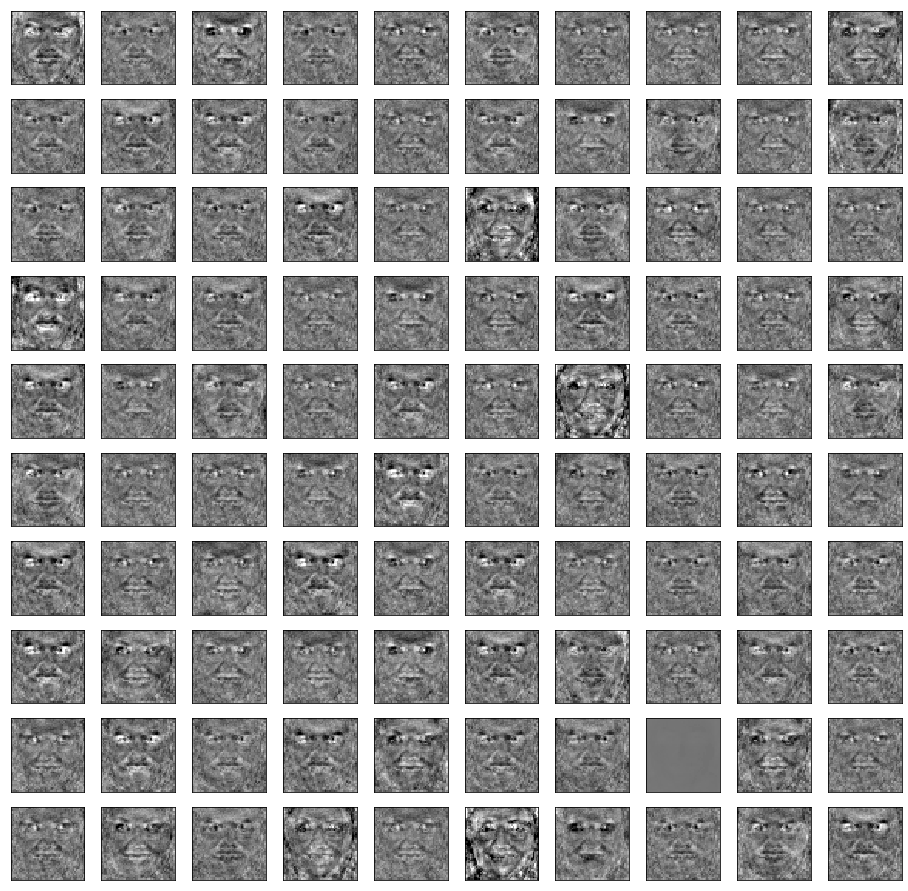

In [63]:
fig, axes = plt.subplots(10, 10, figsize=(16,16))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(48, 48), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

**Note:** On remarque que le MLP apprend en extrayant les caractéristiques du visage.

# Test avec webcam du model

In [64]:
# Code pour installer les librairies
!pip install opencv-python tensorflow
!pip install cvlib
!pip install --upgrade cvlib

In [65]:
# Importation des librairies
import os
import cvlib as cv
import cv2

In [66]:
# Code qui implémente le modèle sur une webcam
webcam = cv2.VideoCapture(0)
while webcam.isOpened():
    status, frame = webcam.read()
    face, confidence = cv.detect_face(frame)
    
    for ind, f in enumerate(face):
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]
        
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0,255,0), 2)
        
        face_crop = np.copy(frame[startY:endY, startX:endX])
        
        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue
            
        face_crop = cv2.resize(face_crop, (48,48))
        face_crop = face_crop.astype('float')/255.0
        
        face_crop = face_crop[:,:, 0].reshape((1,-1))
        
        pred = mlp.predict(face_crop)[0]

        label = Gender[pred]

        label = "Gender: {}".format(label)
        
        Y = startY - 10 if startY - 10 > 10 else startY + 10
    
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("gender detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows() 

* #### Résultat

![capture_homme](capture_homme.png)

![capture_femme](capture_femme.png)